## Imports

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

from khan_helpers import Experiment
from khan_helpers.constants import FIG_DIR
from khan_helpers.functions import multicol_display

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import seaborn as sns
%matplotlib inline

Experiment & Participant classes, helper functions, and variables used across multiple notebooks can be found in `/mnt/code/khan_helpers/khan_helpers`, or on GitHub, [here](https://github.com/contextlab/efficient-learning-khan/tree/master/code/khan_helpers).<br />You can also view source code directly from the notebook with:<br /><pre>    from khan_helpers.functions import show_source<br />    show_source(foo)</pre>

## Set plotting params

In [2]:
plt.rcParams['pdf.fonttype'] = 42
sns.set_context('paper')
cmap = 'rocket'

## Load data

In [3]:
exp = Experiment()

# quiz question topic vectors
forces_qs = exp.get_question_vecs(lectures='forces')
bos_qs = exp.get_question_vecs(lectures='bos')

# lecture transcripts
forces_text = exp.forces_transcript.splitlines()
bos_text = exp.bos_transcript.splitlines()

## Lecture & question content timeseries fig

In [4]:
gridspec_kws = {
    'wspace': 0.1, 
    'hspace': 0.3, 
    'width_ratios': (1, 1, .3, 1)
}
cbar_kws = {'pad': 0.1}

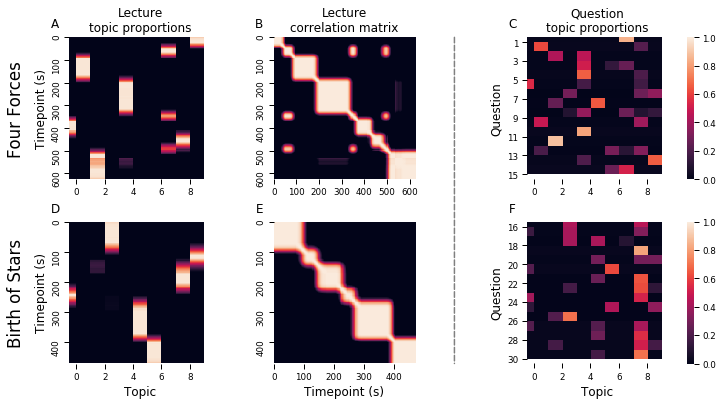

In [5]:
fig, axarr = plt.subplots(2, 4, gridspec_kw=gridspec_kws)
fig.set_size_inches(12, 6)
(
    (a, b, sep1, c), 
    (d, e, sep2, f)
) = axarr

# ======== Four Forces ========
# lecture topic proportions by timepoint
sns.heatmap(exp.forces_traj, vmin=0, vmax=1, xticklabels=2, yticklabels=100, 
            cbar=False, cmap=cmap, ax=a)
a.collections[0].remove()
aspect = exp.forces_traj.shape[1] / exp.forces_traj.shape[0]
a.imshow(exp.forces_traj, aspect=aspect, vmin=0, vmax=1, cmap=cmap)
a.set_title('Lecture\ntopic proportions', fontsize=12)
a.set_ylabel('Timepoint (s)', fontsize=12)
a.annotate('Four Forces', xy=(-.75, .5), xycoords=a.yaxis.label, 
           size='xx-large', rotation=90, ha='right', va='center')

# lecture timepoint-by-timepoint correlation matrix
corrmat = np.corrcoef(exp.forces_traj)
sns.heatmap(corrmat, vmin=0, vmax=1, xticklabels=100, yticklabels=100, 
            cbar=False, cmap=cmap, ax=b)
b.collections[0].remove()
b.imshow(corrmat, aspect='equal', vmin=0, vmax=1, cmap=cmap)
b.set_title('Lecture\ncorrelation matrix', fontsize=12)

# topic proportions by quiz question
sns.heatmap(forces_qs, vmin=0, vmax=1, xticklabels=2, yticklabels=2, 
            cmap=cmap, cbar=True, cbar_kws=cbar_kws, ax=c)
c.collections[0].remove()
aspect = forces_qs.shape[1] / forces_qs.shape[0]
c.imshow(forces_qs, aspect=aspect, vmin=0, vmax=1, cmap=cmap)
c.set_yticklabels(list(range(1, 16, 2)), rotation=0)
c.set_title('Question\ntopic proportions', fontsize=12)
c.set_ylabel('Question', fontsize=12)

# ======== Birth of Stars ========
# lecture topic proportions by timepoint
sns.heatmap(exp.bos_traj, vmin=0, vmax=1, xticklabels=2, yticklabels=100, 
            cbar=False, cmap=cmap, ax=d)
d.collections[0].remove()
aspect = exp.bos_traj.shape[1] / exp.bos_traj.shape[0]
d.imshow(exp.bos_traj, aspect=aspect, vmin=0, vmax=1, cmap=cmap)
d.set_xlabel('Topic', fontsize=12)
d.set_ylabel('Timepoint (s)', fontsize=12)
d.annotate('Birth of Stars', xy=(-.75, .5), xycoords=d.yaxis.label, 
           size='xx-large', rotation=90, ha='right', va='center')

# lecture timepoint-by-timepoint correlation matrix
corrmat = np.corrcoef(exp.bos_traj)
sns.heatmap(corrmat, vmin=0, vmax=1, xticklabels=100, yticklabels=100, 
            cbar=False, cmap=cmap, ax=e)
e.collections[0].remove()
e.imshow(corrmat, aspect='equal', vmin=0, vmax=1, cmap=cmap)
e.set_xlabel('Timepoint (s)', fontsize=12)

# topic proportions by quiz question
sns.heatmap(bos_qs, vmin=0, vmax=1, xticklabels=2, yticklabels=2, 
            cmap=cmap, cbar=True, cbar_kws=cbar_kws, ax=f)
f.collections[0].remove()
aspect = bos_qs.shape[1] / bos_qs.shape[0]
f.imshow(bos_qs, aspect=aspect, vmin=0, vmax=1, cmap=cmap)
f.set_yticklabels(list(range(16, 31, 2)), rotation=0)
f.set_xlabel('Topic', fontsize=12)
f.set_ylabel('Question', fontsize=12)

# separator line
xyA = (0, 1)
xyB = (0, 0)
vline = ConnectionPatch(xyA, xyB, coordsA='axes fraction', 
                        coordsB='axes fraction', axesA=sep1, axesB=sep2, 
                        linestyle='--', linewidth=1.5, color='grey')
sep2.add_artist(vline)
sep1.axis('off')
sep2.axis('off')

# panel labels
labels = 'ABCDEF'
for i, ax in enumerate((a, b, c, d, e, f)):
    ax.text(-.1, 1.07, labels[i], horizontalalignment='center', 
            transform=ax.transAxes, fontsize=12)
    
# plt.savefig(FIG_DIR.joinpath('content-timeseries.pdf'), dpi=1000)
plt.show()

## Lecture-question similarity timeseries fig

In [6]:
sns.set_context('talk')
sns.set_palette(sns.hls_palette(15, h=.3))

forces_qcorrs = 1 - cdist(exp.forces_traj, forces_qs, 'correlation')
bos_qcorrs = 1 - cdist(exp.bos_traj, bos_qs, 'correlation')

# choose some sample points to compare lecture & question content
forces_high = [117, 537]
forces_low = [252, 384]
bos_high = [167, 455]
bos_low = [102, 430]

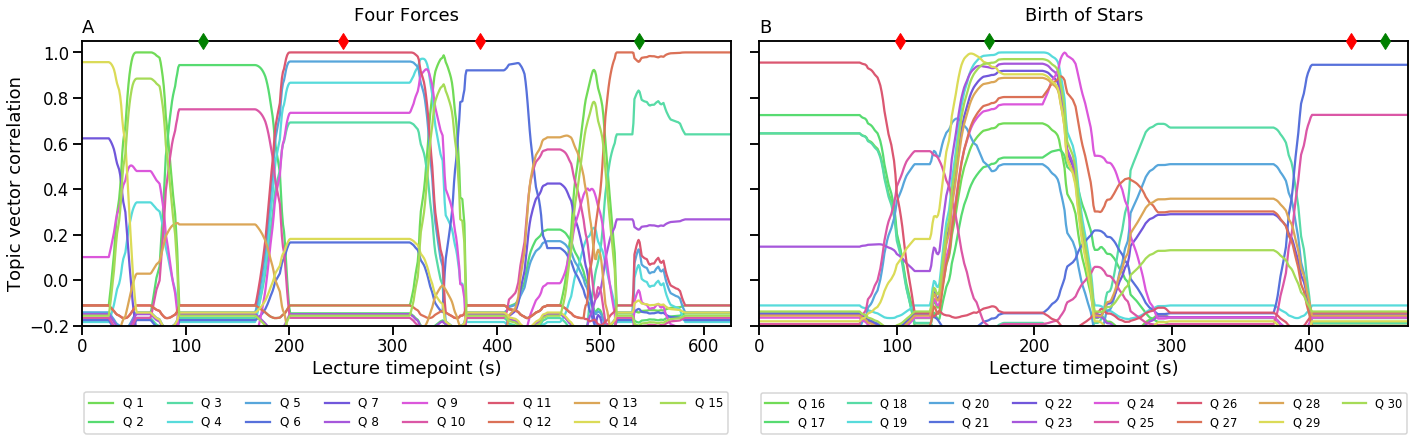

In [8]:
fig, axarr = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(20, 7)
fax, bax = axarr

# Four Forces
fax.plot(forces_qcorrs)
fax.plot(forces_high, [1.05, 1.05], 'g', linestyle='', marker='d', 
         markersize=12, clip_on=False, zorder=10)
fax.plot(forces_low, [1.05, 1.05], 'r', linestyle='', marker='d', 
         markersize=12, clip_on=False, zorder=10)
fax.set_xlim(0, exp.forces_traj.shape[0])
fax.set_ylim(-.2, 1.05)
fax.set_xlabel('Lecture timepoint (s)')
fax.set_ylabel('Topic vector correlation')
fax.set_title('Four Forces', pad=20)
fax.legend(labels=[f'Q {i}' for i in range(1, 16)], fontsize=12, loc=8, 
           ncol=8, bbox_to_anchor=(.5, -.4))
fax.grid(False)
fax.text(0, 1.03, 'A', horizontalalignment='left', transform=fax.transAxes)

# Birth of Stars
bax.plot(bos_qcorrs)
bax.plot(bos_high, [1.05, 1.05], 'g', linestyle='', marker='d', 
         markersize=12, clip_on=False, zorder=10)
bax.plot(bos_low, [1.05, 1.05], 'r', linestyle='', marker='d', 
         markersize=12, clip_on=False, zorder=10)
bax.set_xlim(0, exp.bos_traj.shape[0])
bax.set_ylim(-.2, 1.05)
bax.set_xlabel('Lecture timepoint (s)')
bax.set_title('Birth of Stars', pad=20)
bax.legend(labels=[f'Q {i}' for i in range(16, 31)], fontsize=11.5, loc=8, 
           ncol=8, bbox_to_anchor=(.5, -.4))
bax.grid(False)
bax.text(0, 1.03, 'B', horizontalalignment='left', transform=bax.transAxes)

plt.subplots_adjust(wspace=-1)
plt.tight_layout()
# plt.savefig(FIG_DIR.joinpath('lecture-question-similarity.pdf'))
plt.show()

## Get lecture and question text for sample timepoints

In [8]:
forces_text_samples = []
for tpt in forces_high + forces_low:
    lecture_text = exp.get_timepoint_text('forces', tpt)
    top_q = np.argmax(forces_qcorrs[tpt]) + 1
    q_text = exp.questions.loc[top_q, 'question']
    
    forces_text_samples.append(f'...{lecture_text}...')
    forces_text_samples.append({f'Q {top_q}': f'<br>{q_text}'})
    

bos_text_samples = []
for tpt in bos_high + bos_low:
    lecture_text = exp.get_timepoint_text('bos', tpt)
    top_q = np.argmax(bos_qcorrs[tpt]) + 16
    q_text = exp.questions.loc[top_q, 'question']
    
    bos_text_samples.append(f'...{lecture_text}...')
    bos_text_samples.append({f'Q {top_q}': f'<br>{q_text}'})

In [9]:
multicol_display(*forces_text_samples, 
                 ncols=2, 
                 caption='Four Forces',
                 col_headers=('Lecture text', 'Most similar question'),
                 header_css={'text-align': 'center'},
                 cell_css={'text-align': 'center', 'font-size': '14px'})

...minus and beta plus decay and just to give you an example of the actual weak interaction if I had some cesium 137 137 means it has 137 nucleons a nucleon is either a proton or a neutron you add up the protons and neutrons of cesium you get 137 and it is cesium because it has exactly 55 protons now the weak interaction is what's responsible for one of the neutrons essentially one of its corks flipping...,Q 2: Which of the following is an example of the Weak Interaction?
...only applies over very very very small distances subatomic I should even say sub nucleic distances then the strong interaction comes into play so then you have the strong interaction actually keeping these charges together and once again just to keep it in in in mind relative to gravity it is 10 to the 38th 10 38 times the strength times the strength of gravity or it's about a hundred times stronger than the electromagnetic force so once again the...,Q 12: Roughly how many times stronger is the Strong Force than gravity?
...anything beyond that it kind of disappears as an actual force as an actual interaction now the next the next force up the hierarchy which is one that we are more familiar with it is something it's what actually dominates most of the chemistry that we deal with and electromagnetism that we deal with and that's the electro magnetic force we write it in magenta electro magnetic magnetic force and just to give...,Q 11: Which force is stronger than the Electromagnetic Force?
...electrostatic force electro static and then on the other side of the word yes you have the magnetic part and magnets you know you have you've played with magnets on your fridge they what's what you know if they're the same side of the magnet they're going to repel each other if they're the opposite sides opposite poles they're going to attract each other so why is it called one force and it's called one force and once again I'm not going to go into detail here it's called one force because it turns out that the cool force the electrostatic force and the...,Q 6: Electricity and magnetism can be shown to be two cases of the same force if we:


In [10]:
multicol_display(*bos_text_samples, 
                 ncols=2, 
                 caption='Birth of Stars',
                 col_headers=('Lecture text', 'Most similar question'),
                 header_css={'text-align': 'center'},
                 cell_css={'text-align': 'center', 'font-size': '14px'})

...protons close enough to each other then all of a sudden the strong force will overtake it's much stronger than the Coulomb force and that these two hydrogen's will actually these this these nucleuses would actually fuse or that nuclei well anyway they would actually fuse together and so that is what actually happens once this gets hot and dense enough you now have enough pressure enough temperature to overcome the Coulomb force and bring these...,Q 19: Which of the following can overcome the Coulomb Force?
...where you get something like that so you have to reach a certain threshold or the mass where the pressure and the temperature due to the heavy mass gets so large that you start this fusion at but the smaller you have above that threshold this the slower the fusion will occur but if you're supermassive the fusion will occur really really fast so that's a general idea of just how stars get formed and why they don't collapse on themselves and why they are these kind of little balls of fusion reactions existing in the universe and the next few videos we'll talk about...,Q 19: Which of the following can overcome the Coulomb Force?
...gravity from everything that wants to get to that center of mass of our entire cloud the temperature here the temperature here is approaching 10 million Kelvin and at that point something neat happens it to kind of realize the neat thing that's happening let's remember what a hydrogen atom looks like a hydrogen and even more I'm just going to focus on the hydrogen nucleus so the hydrogen nucleus is a proton if you want to think about a hydrogen atom it also has an electron orbiting around or floating around and let's draw another hydrogen atom over...,Q 19: Which of the following can overcome the Coulomb Force?
...actually are things that never get to that quite that threshold to fuse all the way into helium there are a few things that don't quite make the threshold of stars that only fuse to this level so they are generating some of their eat or there are even smaller objects that just get to the point there's a huge temperature and pressure but fusion is not actually occurring inside of the core and something like Jupiter would be an example and you can go several several masses above Jupiter where you get something like that so you have to reach a certain threshold or the mass where the pressure and the temperature due to the heavy mass gets...,"Q 24: When two nuclei fuse together, how does the mass of the combined nucleus compare to the mass of each of the original nucleus?"
